#  Step:1 Importing liabraries 

In [1]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step:2 Load Dataset

In [2]:
dataset = pd.read_excel('C:/Users/HP/Downloads/Assignment/EastWestAirlines.xlsx', sheet_name='data')

In [3]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Column rename.

dataset= dataset.rename(columns={'ID#':'ID', 'Award?':'Award'})

# Step:3  Dataset Preprocessing

In [5]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  dataset.drop(['ID','Award'], axis=1)
dataset1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


# I am using two transformation..since to ckeck how cluster numbers varry with diff transformation.

standardization

In [6]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

MinMaxScalar

In [7]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

# Step:4 PCA

4.1 Running PCA of standardized data.

In [8]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [9]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [10]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [11]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

Conclusion:


by applying PCA on standardized data with 95% variance it gives 8 PCA components.

4.2 Running PCA of MinMaxscalar data.

In [12]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [13]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [14]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


Conclusion:


By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

# Step 5: KMeans Clustering.



# 5.1 How many numbers of cluster. Also deciding which transformation data we will use to build model.

First Stage: Taking stadardization transformation data & PCA applied on it.


Method1:

In [15]:
 !pip install yellowbrick

model1


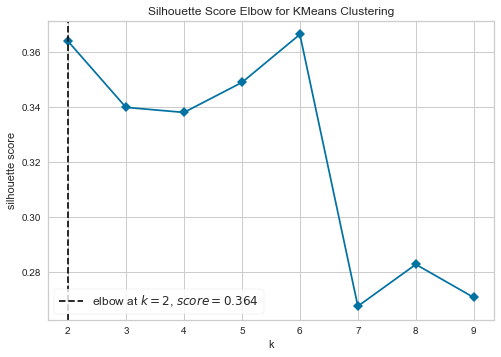

model2


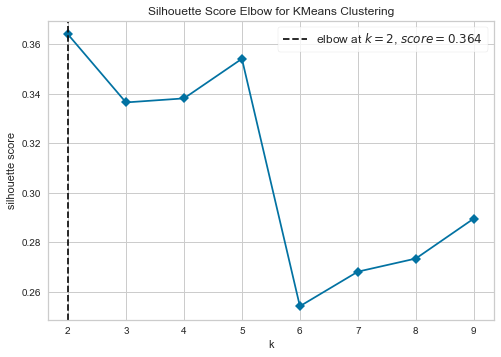

In [16]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

Conclusion:



Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.



Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering. Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.



So before using KMeans clustering it is better to have discussion or decision on outliers.

Method 2

In [18]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961763
For n_clusters = 3 The average silhouette_score is : 0.33995433487179844
For n_clusters = 4 The average silhouette_score is : 0.3381189559647632
For n_clusters = 5 The average silhouette_score is : 0.34900038483046714
For n_clusters = 6 The average silhouette_score is : 0.3664563135193489
For n_clusters = 7 The average silhouette_score is : 0.2677310100582736
For n_clusters = 8 The average silhouette_score is : 0.2829201945740011
For n_clusters = 9 The average silhouette_score is : 0.2708994842654452


Conclusion:


By taking standardize data pca it gives number of cluster =6 with silhoette score = 0.36

Second Stage: Taking MinMaxScalar transformation data & PCA applied on it.


model3


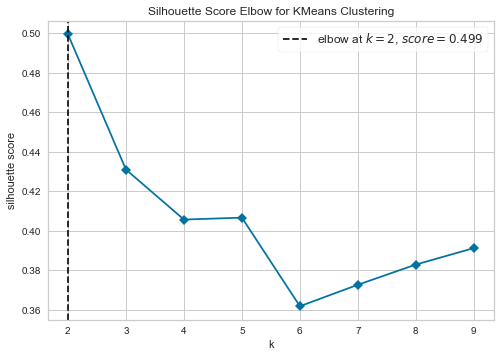

model4


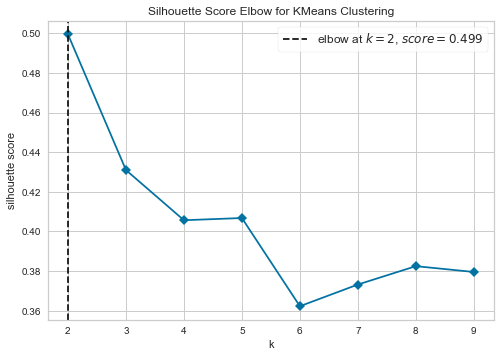

In [19]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0,n_jobs=-1)
model4 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

method2:

In [20]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.14766013760214977
For n_clusters = 3 The average silhouette_score is : 0.14766013760214977
For n_clusters = 4 The average silhouette_score is : 0.14766013760214977
For n_clusters = 5 The average silhouette_score is : 0.14766013760214977
For n_clusters = 6 The average silhouette_score is : 0.14766013760214977
For n_clusters = 7 The average silhouette_score is : 0.14766013760214977
For n_clusters = 8 The average silhouette_score is : 0.14766013760214977
For n_clusters = 9 The average silhouette_score is : 0.14766013760214977


Conclusion:



By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.1476



If we check silhouette score with standardize data pca kmeans model 0.36>0.14 So we will PCA which is applied on normalizatied data. Since the score is very less. Best score alwways close to +1.

# 5.2 Run K-Means:

In [21]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [22]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
# cluster centres associated with each lables

model1.cluster_centers_


array([[ 1.40464444e+00, -1.00858783e+00, -8.11261497e-02,
         9.76168185e-02, -2.55378368e-01, -2.45603722e-01,
        -7.28504252e-02, -1.73368142e-02],
       [-1.03863303e+00,  2.59889768e-01, -1.50730771e-02,
        -8.62901203e-02, -5.36424632e-02,  1.39377623e-01,
         5.69394919e-02, -5.76591346e-04],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01]])

In [25]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16718.252304014568

In [26]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-16718.252304014568

In [27]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

# 5.3 visualizing silhoutte score..for different cluster

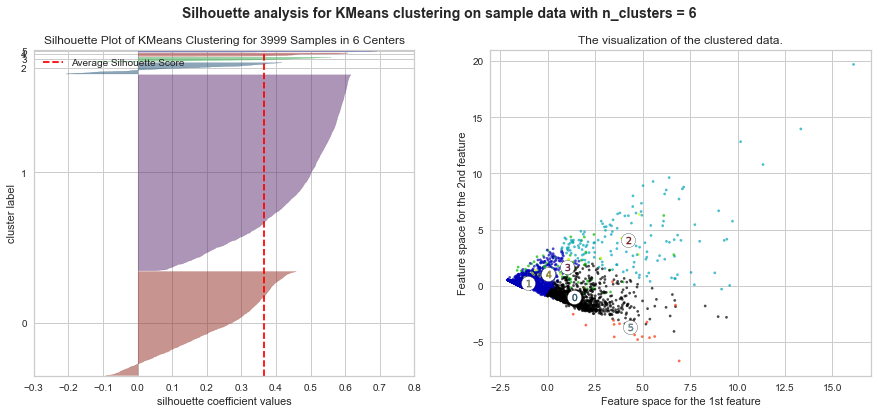

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

# 5.4 Putting Cluster lables into original dataset And analysis of the same.

In [29]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [30]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([dataset.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


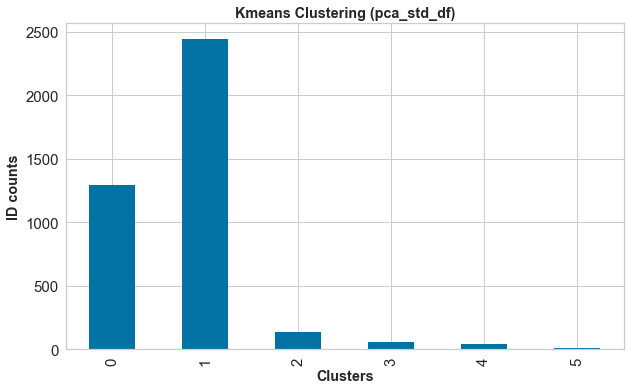

In [31]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Step 6: Hierarchical Clustering Algorithm

The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:

# 6.1 How many numbers of cluster. Also deciding which transformation data we will use to build model.

First Stage: Taking stadardization transformation data & PCA applied on it.

Method1: By using Dendrogram

In [37]:
# Applying Dendrogram on PCA data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

# import scipy.cluster.hierarchy as shc
# for methods in ['single','complete','average','weighted','centroid','median','ward']: 
#     plt.figure(figsize =(20, 6)) 
    
#     dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
#     plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
#     Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))
    
# Note: the execution of this cell takes time so i have attached output graphs below

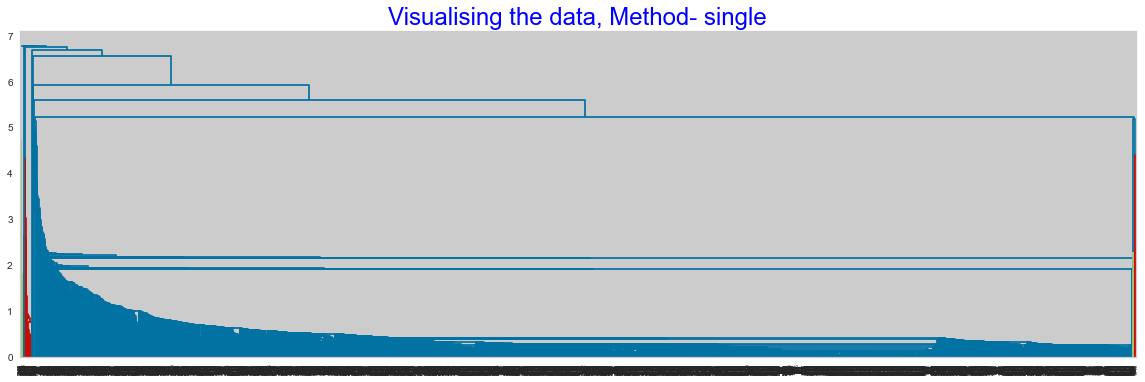

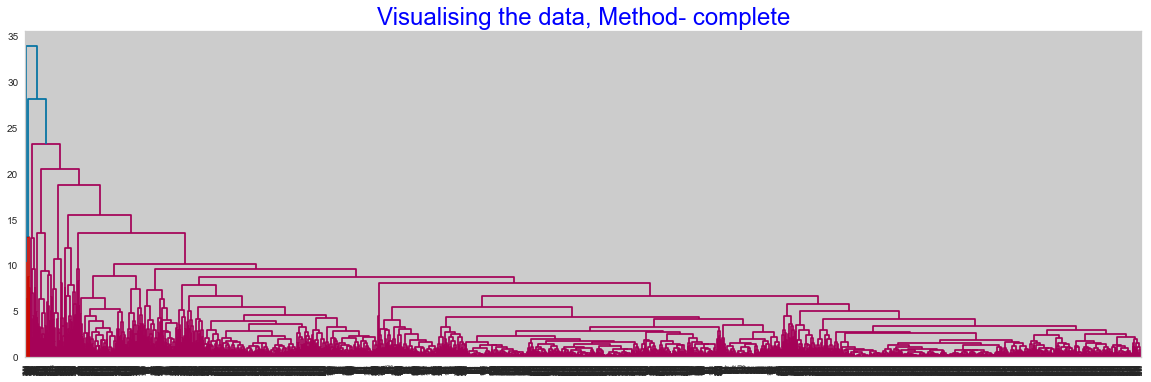

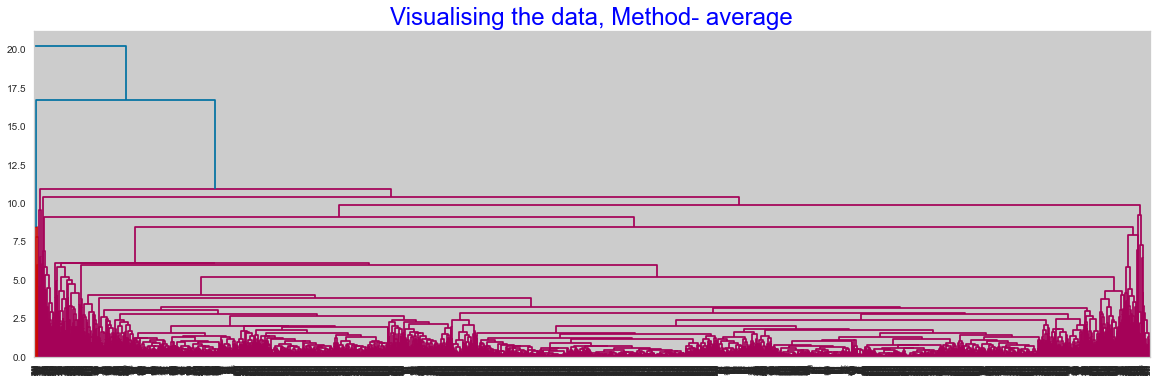

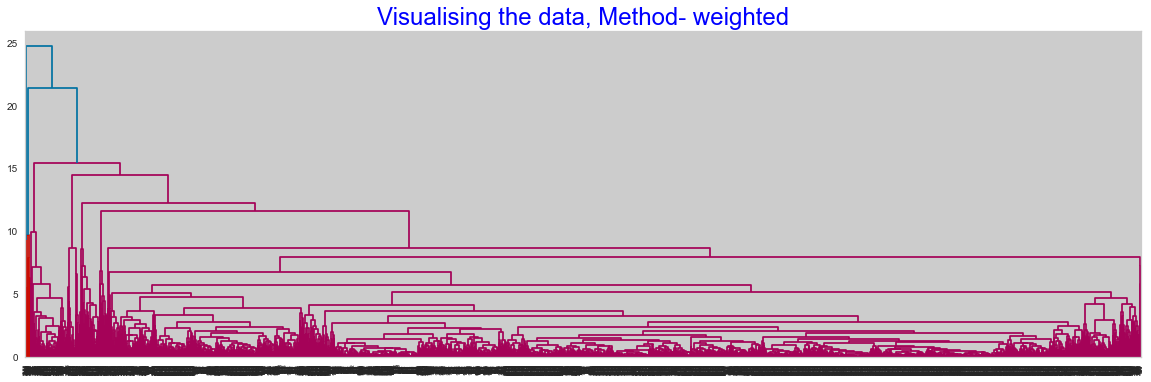

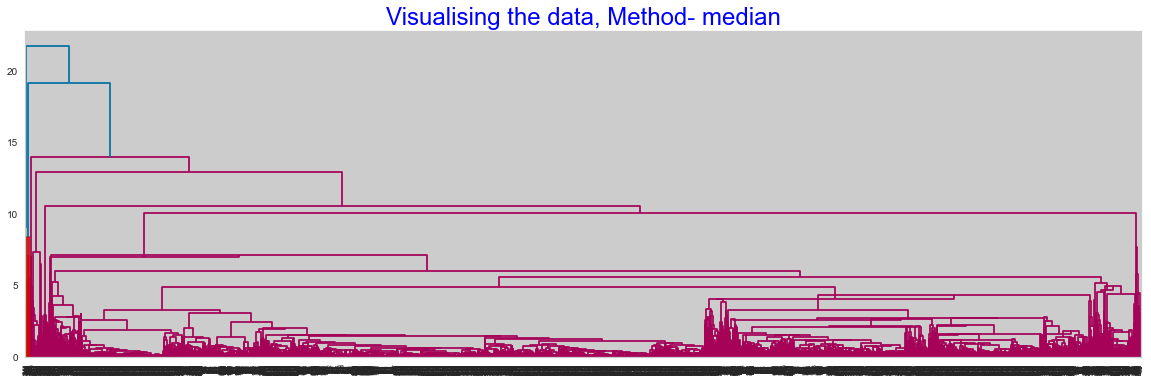

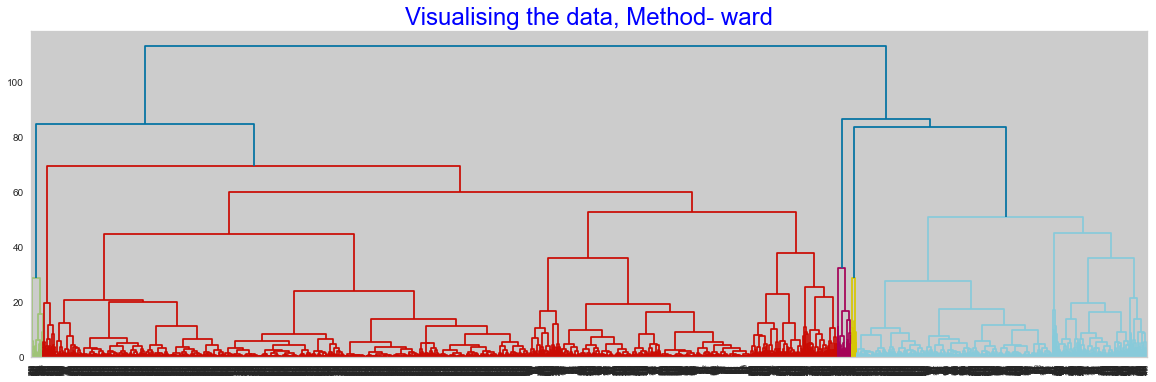

Method 2: Silhouette Score method.

In [38]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.31396055949505675
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017467

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846737
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740986
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740986
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168968

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3282481973781312
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102614
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6940154925011895
For 

Conclusion: Although max score is with cluster numbers 4. I have selected tcluster number = 5

Second Stage: Taking MinMax transformation data & PCA applied on it.

In [39]:
### Here i have avoded to apply dendrogram since it takes time to run code.

In [40]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4526351664478744
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.585780896047594
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003973034034864
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6061073734453646

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3739125364654645
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4542833655116025
For n_clusters = 3 The average silhouette_score with linkage- average : 0.45064261018788887
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5029366855064077

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3654778699731554
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.45615471007123654
For n_clusters = 4 The average silhouette_score with linkage- average : 0.39465688584567526
For

Conclusion: dataset with MinMax transformation & PCA applied on it doesn't imporoved score here. So i am taking previous cell code conclusion.

# 6.2 Run Hierarchical Clustering.(Agglomerative Clustering)

In [41]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [43]:
# cluster labels for each point

agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

3999

In [45]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_

1

In [46]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [47]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.804

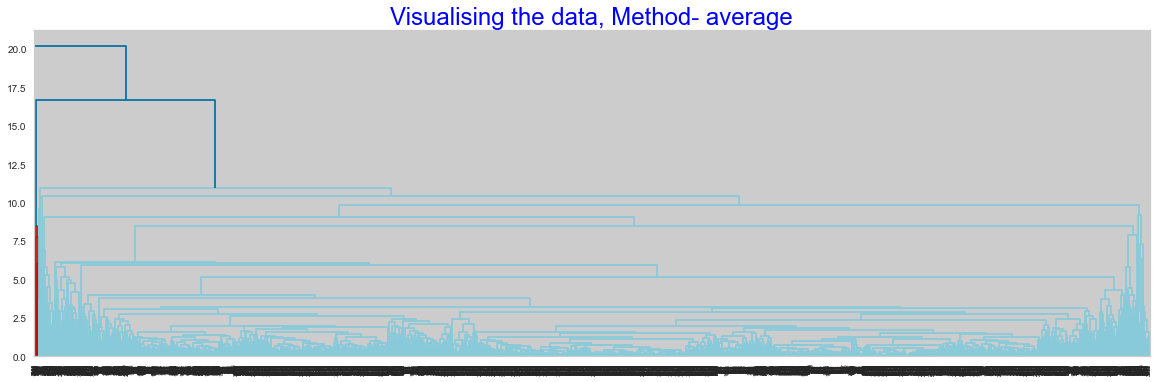

In [48]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

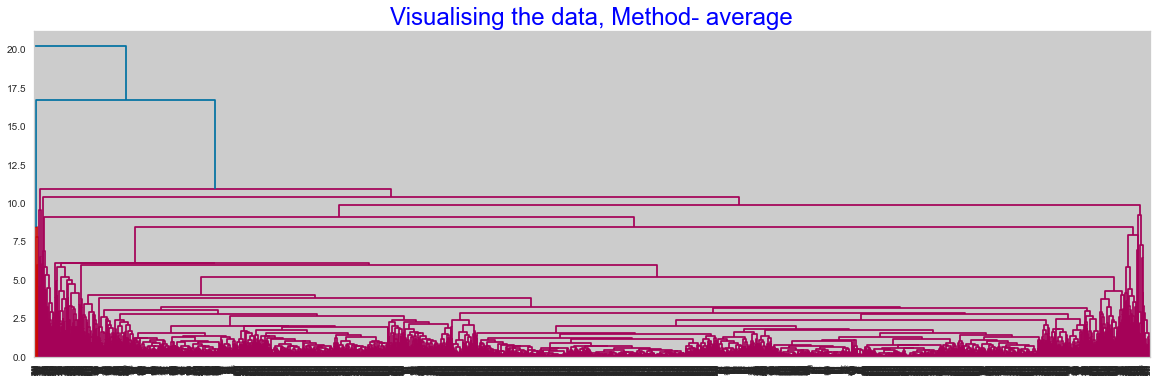

# 6.4 Putting Cluster lables into original dataset And analysis of the same.

In [49]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [50]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


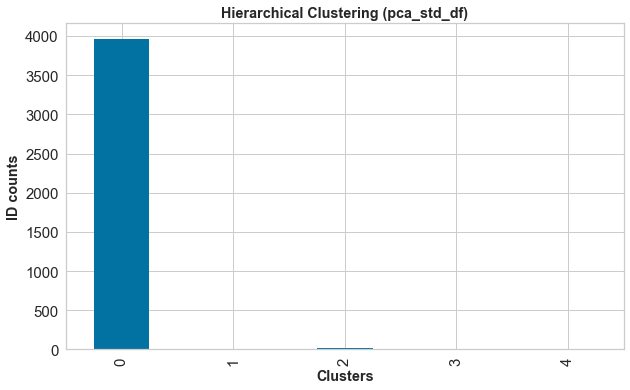

In [51]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Step 7: Conclusion Between Kmeans & Hierarchical

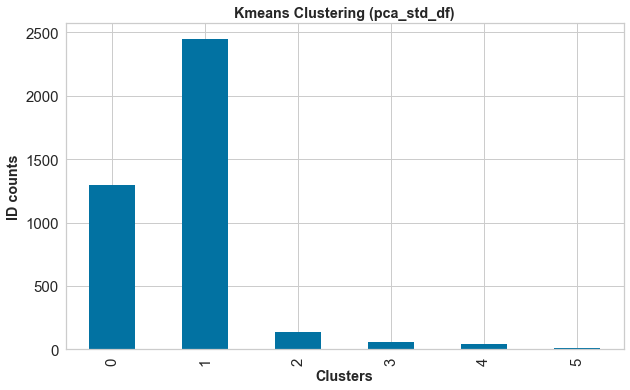

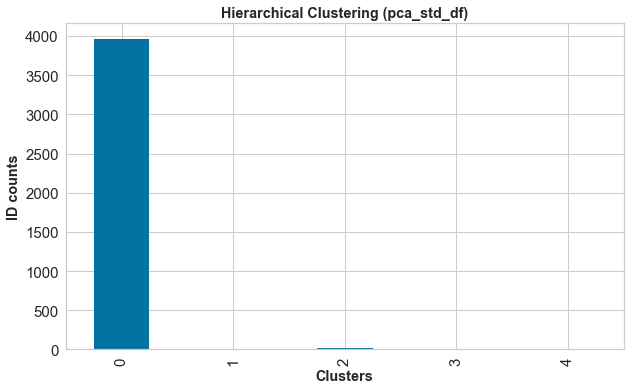

In [52]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297
1,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444
2,141,141,141,141,141,141,141,141,141,141,141,141
3,59,59,59,59,59,59,59,59,59,59,59,59
4,43,43,43,43,43,43,43,43,43,43,43,43
5,15,15,15,15,15,15,15,15,15,15,15,15


In [53]:
hie_df.groupby(['Hie_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,,
0,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965
1,10,10,10,10,10,10,10,10,10,10,10,10
2,15,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4,4
4,5,5,5,5,5,5,5,5,5,5,5,5


Conclusion: We will go with Kmeans Clustering Since in hierarchiacl clustering all data is gathherd in one cluster only.

# Cluster Anlysis for Future Decision (Kmeans clustering)

In [54]:
# Groupby Cluster lables

count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297
1,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444
2,141,141,141,141,141,141,141,141,141,141,141,141
3,59,59,59,59,59,59,59,59,59,59,59,59
4,43,43,43,43,43,43,43,43,43,43,43,43
5,15,15,15,15,15,15,15,15,15,15,15,15


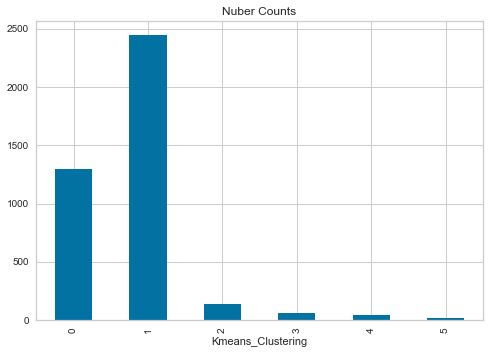

In [55]:
# Total numbers in each cluster..

count = count_df.xs('ID' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

Conclusion:


In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1. (clusters avg. is taken & renamed from next code onwards)


In [56]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [57]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
ID,1620.120278,2235.338380,1742.758865,2110.423729,2269.372093
Balance,117499.114109,42349.329787,187792.460993,117326.186441,68876.581395
Qual_miles,50.790285,49.324877,471.163121,5445.305085,23.255814
cc1_miles,3.693909,1.188625,2.262411,2.033898,1.139535
cc2_miles,1.000000,1.000000,1.000000,1.000000,2.348837
cc3_miles,1.001542,1.000409,1.000000,1.000000,1.000000
Bonus_miles,38745.505012,4278.993863,33236.602837,19059.610169,14689.837209
Bonus_trans,18.834233,6.596563,27.978723,12.305085,17.534884
Flight_miles_12mo,327.383192,209.261047,5773.602837,965.796610,582.627907
Flight_trans_12,0.985351,0.641162,16.730496,2.881356,2.209302


Conclusion :

As decided need to focous on first two clusters..


Considering past Award status(0 or 1) cluster number1 shows award avg as 0.56 that means people awarded with scheme.


Similarly for cluster number 2 award avg. is minimum. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bnus points & different card tranction bonus.

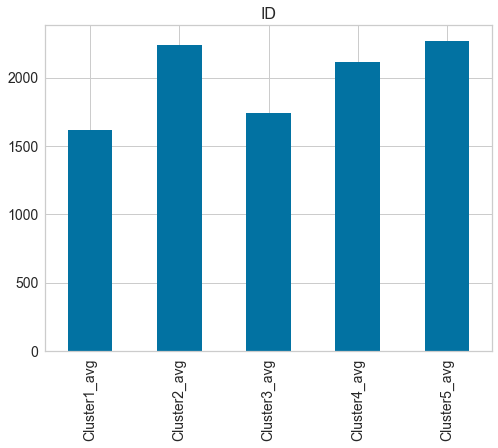

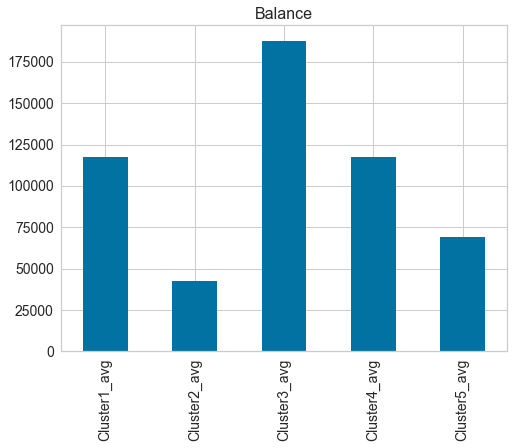

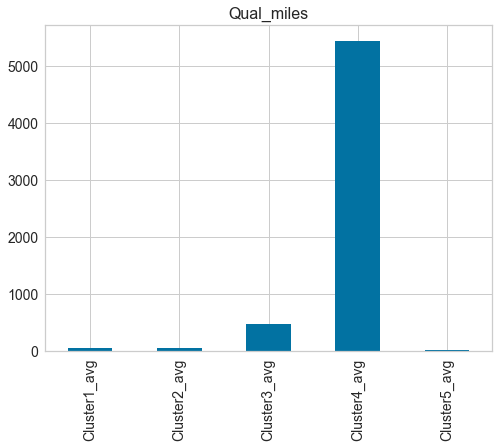

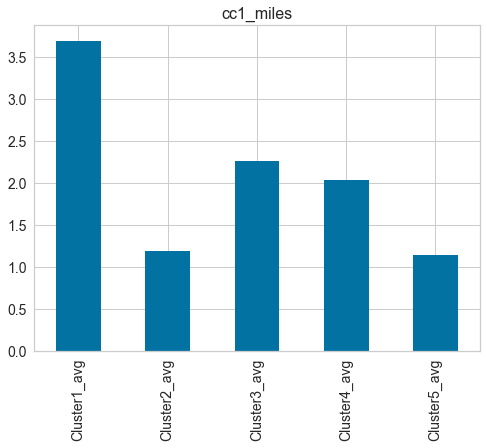

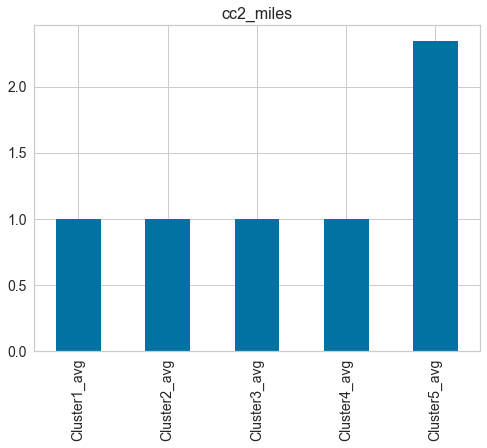

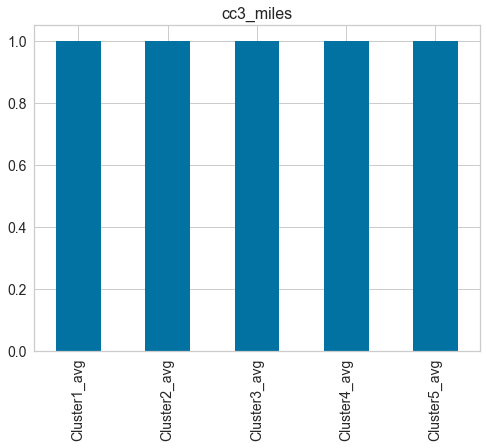

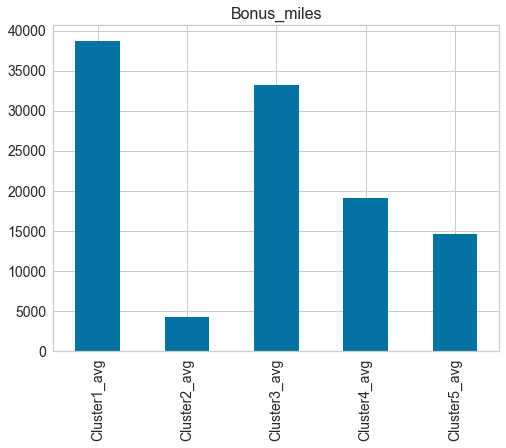

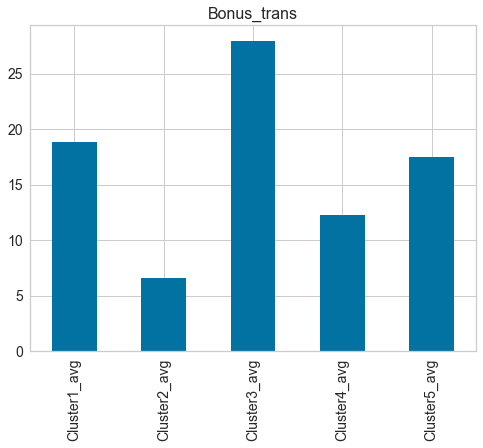

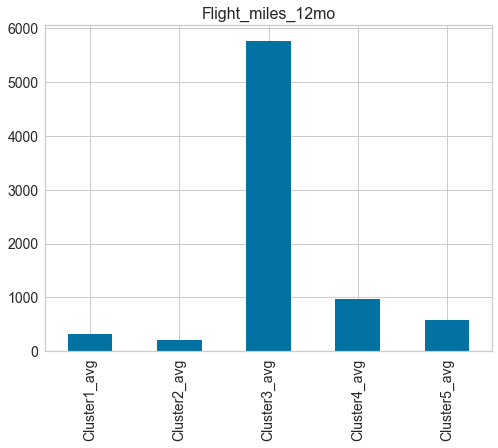

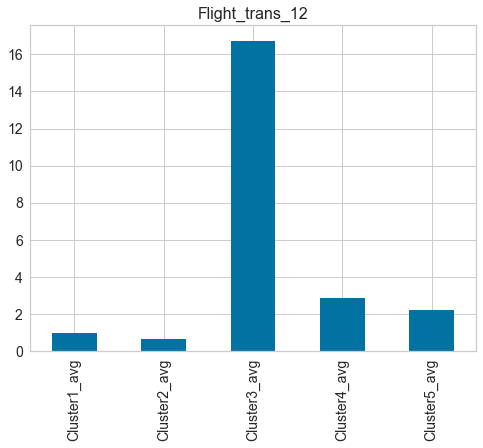

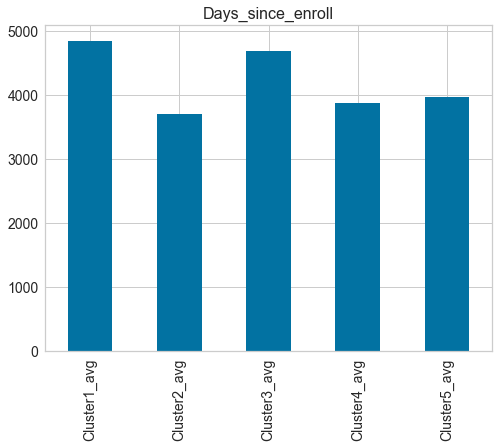

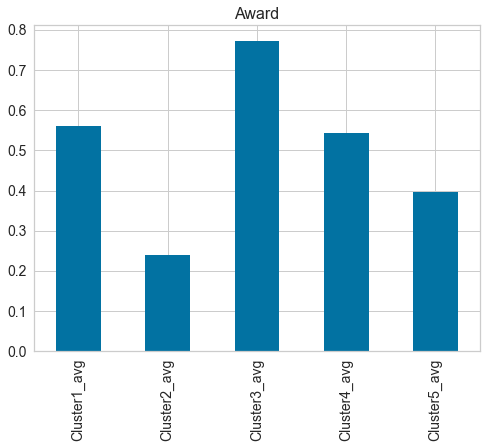

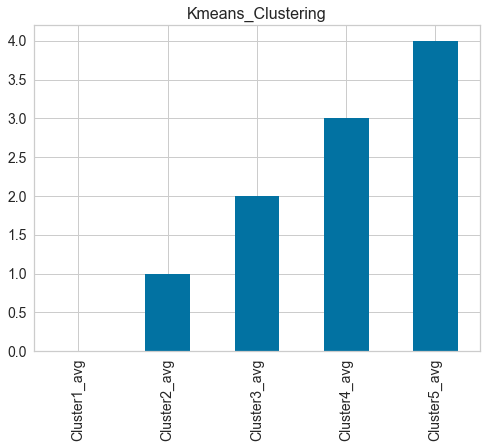

In [58]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

Conclusion:
    
    
I have applied EDA to analyze dataset.Discovered correlation between diff variables and found no colinearity.


Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.


I have used & analyzed two clustering techniques here..i) KMeans & ii) Hierarchical Clusterig.



By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the MinMaxScalr found less score so not used for further model building.



KMeans clustering is sensitive to outliers.Since produced min. sil. score. whereas hierarchical gives max. in this case.


Hierarchical clustering given total cluster number=5, but when i comapred both kmean & Hierarchical clustering, the hierarchical clustering contains approx 99% data in cluster 1 only. So this will not useful to analyze diff. customer. So i continued with KMeans.
